In [1]:
import xarray as xr
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import dask

In [2]:
ds = {}
for m in [1]:
    ds[m] = xr.open_zarr(f'/nethome/sebil001/NEMO_Ensemble/Pspacetime_{m:03d}.zarr/')
    s = np.where(ds[m].time[:,0]==ds[m].time[0,0])[0]
    dspace = ds[m].isel(traj=s).load()
    s = np.where(np.logical_and(ds[m].lon[:,0]==ds[m].lon[0,0], ds[m].lat[:,0]==ds[m].lat[0,0]))[0]
    dtime = ds[m].isel(traj=s).load()
    dzero = ds[m].sel(traj=0).load()
print(dspace)
print(dtime)
print(dzero)


<xarray.Dataset>
Dimensions:     (traj: 81, obs: 365)
Dimensions without coordinates: traj, obs
Data variables:
    lat         (traj, obs) float64 30.0 30.01 30.01 30.02 ... 28.47 28.47 28.47
    lon         (traj, obs) float64 -75.0 -75.04 -75.09 ... -71.06 -71.0 -70.94
    time        (traj, obs) datetime64[ns] 2010-01-01T12:00:00 ... 2010-12-31...
    trajectory  (traj) float64 0.0 720.0 1.44e+03 ... 5.688e+04 5.76e+04
    z           (traj, obs) float64 1.0 1.006 1.002 0.9934 ... 5.783 5.784 5.795
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.1-108-g4bac223f
<xarray.Dataset>
Dimensions:     (traj: 30, obs: 365)
Dimensions without coordinates: traj, obs
Data variables:
    lat         (traj, obs) float64 30.0 30.01 30.01 30.02 ... nan nan nan nan
    lon         (traj, obs) float64 -75.0 -75.04 -75.09 

In [4]:
dspace

<xarray.Dataset>
Dimensions:     (traj: 81, obs: 365)
Dimensions without coordinates: traj, obs
Data variables:
    lat         (traj, obs) float64 30.0 30.01 30.01 30.02 ... 28.47 28.47 28.47
    lon         (traj, obs) float64 -75.0 -75.04 -75.09 ... -71.06 -71.0 -70.94
    time        (traj, obs) datetime64[ns] 2010-01-01T12:00:00 ... 2010-12-31...
    trajectory  (traj) float64 0.0 720.0 1.44e+03 ... 5.688e+04 5.76e+04
    z           (traj, obs) float64 1.0 1.006 1.002 0.9934 ... 5.783 5.784 5.795
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.1-108-g4bac223f

In [12]:
dmem = xr.open_zarr(f'/nethome/sebil001/NEMO_Ensemble/Pspacetime_1p_001.zarr/').load()
for m in range(2, 51):
    ds = xr.open_zarr(f'/nethome/sebil001/NEMO_Ensemble/Pspacetime_1p_{m:03d}.zarr/').load()
    dmem = xr.concat([dmem, ds], dim='traj')
    
dmem

<xarray.Dataset>
Dimensions:     (traj: 50, obs: 365)
Dimensions without coordinates: traj, obs
Data variables:
    lat         (traj, obs) float64 30.0 30.01 30.01 30.02 ... 31.85 31.79 31.72
    lon         (traj, obs) float64 -75.0 -75.04 -75.09 ... -69.99 -69.92 -69.86
    time        (traj, obs) datetime64[ns] 2010-01-01T12:00:00 ... 2010-12-31...
    trajectory  (traj) float64 0.0 1.0 2.0 3.0 4.0 ... 45.0 46.0 47.0 48.0 49.0
    z           (traj, obs) float64 1.0 1.006 1.002 0.9934 ... 8.89 8.93 8.911
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.1-108-g4bac223f

In [13]:
colors = ['r', 'b', 'c', 'k']
datasets = [dspace, dtime, dmem, dzero]
labels = ['Varying space', 'Varying time', 'Varying members', 'Reference particle']
psizes = [5, 5, 5, 20]

0
1
2
3


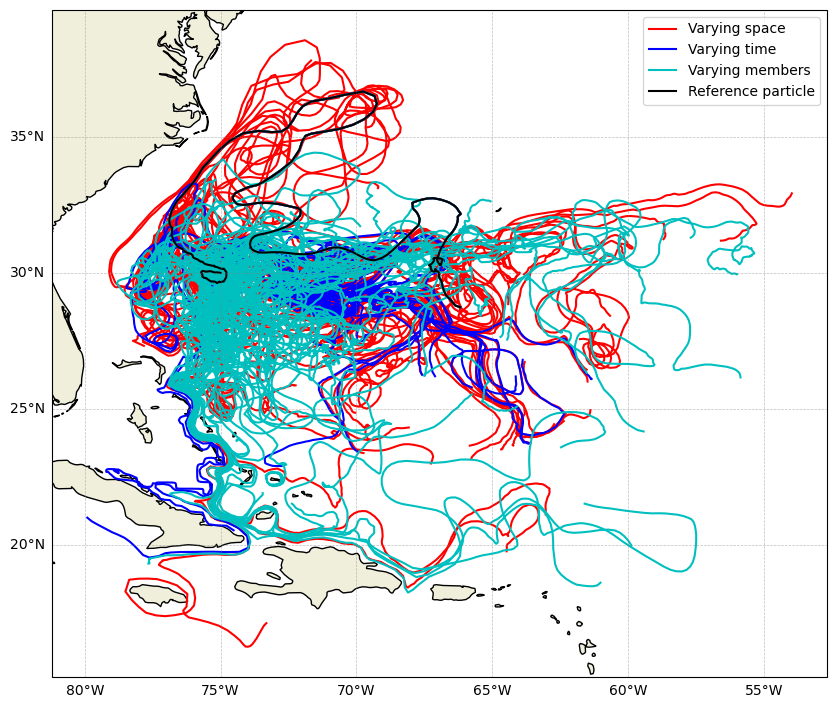

In [17]:
projection = cartopy.crs.PlateCarree(central_longitude=-70)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 9))
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)

for k in range(len(datasets)):
    print(k)
    ax.plot([], c=colors[k], label=labels[k])
    ax.plot(datasets[k].lon.T, datasets[k].lat.T, transform=cartopy.crs.PlateCarree(), c=colors[k])
ax.legend()
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.show()

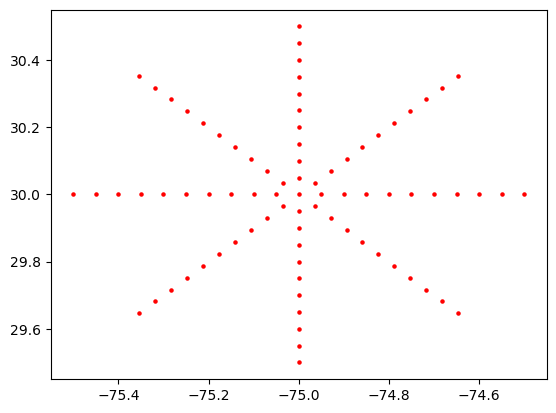

In [8]:
# projection = cartopy.crs.PlateCarree(central_longitude=-70)
# fig, ax = plt.subplots(1, 1,  figsize=(10, 9))
# ax.coastlines()
# ax.add_feature(cartopy.feature.LAND)

plt.scatter(dspace.lon.T[0], dspace.lat.T[0], c='r', s=5, label='Varying space')
# ax.scatter(dtime.lon.T[0], dtime.lat.T[0], transform=cartopy.crs.PlateCarree(), c='b', s=5, label='Varying time')
# ax.scatter(dmem.lon.T[0], dmem.lat.T[0], transform=cartopy.crs.PlateCarree(), c='c', s=5, label='Varying members')
# ax.scatter(dzero.lon.T[0], dzero.lat.T[0], transform=cartopy.crs.PlateCarree(), c='k', s=20, label='Reference particle')
ax.legend()

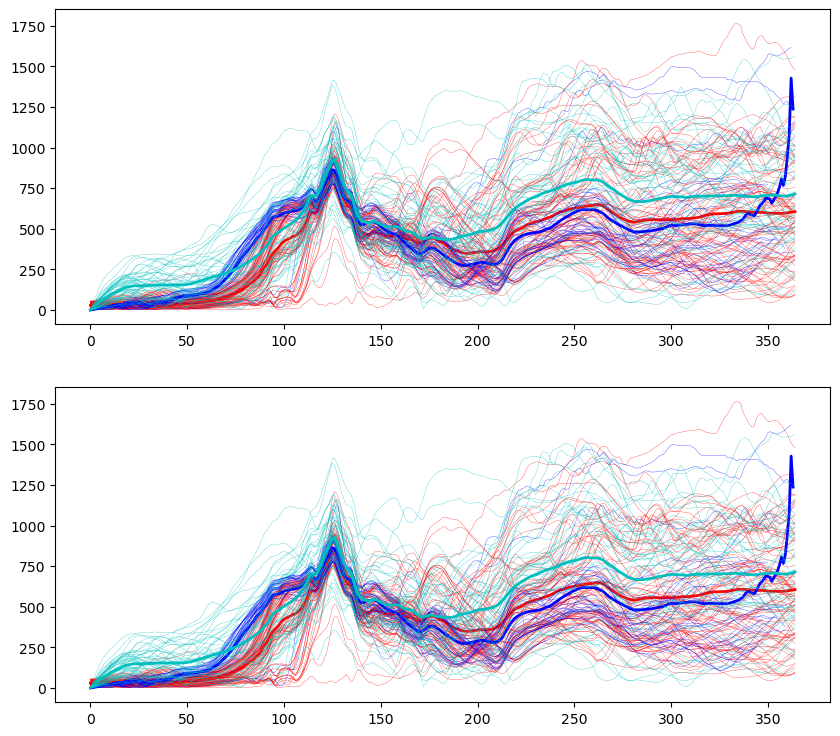

In [16]:
# import geopy

# dist_time = np.hypot((dtime.lat-dtime.lat[0, :])*1852*60, (dtime.lon-dtime.lon[0, :])*1852*60*np.cos(25/180*np.pi))
# dist_space = np.hypot((dspace.lat-dspace.lat[0, :])*1852*60, (dspace.lon-dspace.lon[0, :])*1852*60*np.cos(25/180*np.pi))
# dist_mem = np.hypot((dmem.lat-dmem.lat[0, :])*1852*60, (dmem.lon-dmem.lon[0, :])*1852*60*np.cos(25/180*np.pi))

fig, ax = plt.subplots(2, 1, figsize=(10, 9)) 
for k in range(len(datasets)-1):
    d = datasets[k]
    dist = np.hypot((d.lat-d.lat[0, :])*1852*60, (d.lon-d.lon[0, :])*1852*60*np.cos(25/180*np.pi))
    for i in range(2):
        ax[i].plot(dist[1:,:].T/1e3, colors[k], linewidth=0.2)
        ax[i].plot(np.mean(dist[1:,:], axis=0).T/1e3, colors[k], linewidth=2, label=labels[k])

#     ax[i].plot(dist_space[1:,:].T/1e3, 'r', linewidth=0.2)
#     ax[i].plot(dist_time[1:,:].T/1e3, 'b', linewidth=0.2)
#     ax[i].plot(dist_mem[1:,:].T/1e3, 'c', linewidth=0.2)

#     ax[i].plot(np.mean(dist_space[1:,:], axis=0).T/1e3, 'r', linewidth=2, label='Varying space')
#     ax[i].plot(np.mean(dist_time[1:,:-30], axis=0).T/1e3, 'b', linewidth=2, label='Varying time')
#     ax[i].plot(np.mean(dist_mem[1:,:], axis=0).T/1e3, 'c', linewidth=2, label='Varying member')

        if k == len(datasets)-1:
            ax[i].set_xlabel('Time after release [days]')
            ax[i].set_ylabel('Separation distance [km]')
            if i == 0:
                ax[i].set_xlim([0, 365])
                y0 = 0
            else:
                ax[i].set_xlim([1, 30])
                ax[i].set_yscale('log')
                y0 = 1
            yl = ax[i].get_ylim()
            ax[i].set_ylim([y0, yl[1]])
            ax[i].legend()
plt.show()

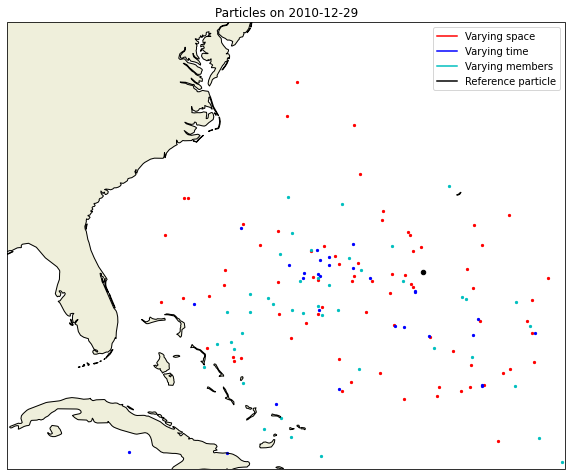

In [7]:
plt.rcParams['savefig.dpi'] = 300

projection = cartopy.crs.PlateCarree(central_longitude=-70)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 9))
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)

plottimes = np.arange(np.datetime64('2010-01-01'), np.datetime64('2010-12-31'), np.timedelta64(1, 'D'))

scat = {}
for k in range(len(datasets)):
    ax.plot([], color=colors[k], label=labels[k])
    d = datasets[k]
    b = np.where(np.logical_and(d['time'] >= plottimes[0], d['time'] < plottimes[1]))
    scat[k] = ax.scatter(d['lon'][b], d['lat'][b], s=psizes[k], transform=cartopy.crs.PlateCarree(), c=colors[k])

ttl = ax.set_title('Particles on ' + str(plottimes[0]))
ax.set_extent([-85, -60, 20, 40], crs=cartopy.crs.PlateCarree())
ax.legend()
frames = np.arange(0, len(plottimes)-1)
    
def animate(t):
    for k in range(len(datasets)):
        d = datasets[k]
        b = np.where(np.logical_and(d['time'].values[:] >= plottimes[t], d['time'].values[:] < plottimes[t+1]))
#         print(plottimes[t], plottimes[t+1], len(b[0]))
        scat[k].set_offsets(np.vstack((d.lon.values[b], d.lat.values[b])).transpose())
    ttl.set_text('Particles on ' + str(plottimes[t]))
    return scat,

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100)
anim
# writergif = animation.PillowWriter(fps = 10)
# writergif.setup(fig, 'Animation_spacetime.gif', dpi = 300) 
anim.save('Animation_spacetime.mp4') #, writer=writergif, dpi = "figure")